# Project: Task 1

##### Problem Description
ACE, a nationwide retail chain, has seen significant sales growth over the past two years. As the company prepares to expand into additional regions and optimise its current operations, senior leadership requires an introductory business intelligence report summarising key sales performance trends.
Your role as a newly onboarded data analyst is to perform an initial data exploration and create a report that answers foundational business questions using the attached sales dataset.
##### Business Impact
This report will serve as a baseline to identify regional performance gaps, customer behaviour patterns, and product category profitability, helping the executive team focus on high-impact areas in subsequent strategy sessions.

In [141]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# read Datasets
retail_data = pd.read_csv("Ace Superstore Retail Dataset.csv", encoding='latin1')
StoreLocations_data = pd.read_csv("Store Locations.csv", encoding='latin1')

## Assessing Data

In [ ]:
retail_data.head(10)

In [ ]:
retail_data.info()

In [ ]:
retail_data.describe()

In [ ]:
retail_data.info()

In [ ]:
StoreLocations_data.head()

In [ ]:
StoreLocations_data.info()

## Data Cleaning

#### Normalisation - Remove the following columns because:

1. They exist in the store location table.
2. They also have some missing values in the retail table.

Columns: Region, City, Country

In [ ]:
retail_data.drop(columns=['Region', 'City', 'Country'], inplace=True)
retail_data.info()

#### Create a relationship between retail_data and StoreLocations_data

In [ ]:
merged_data = pd.merge(retail_data, StoreLocations_data, on='Postal Code', how='left')

In [ ]:
merged_data.head()

In [ ]:
# Assume your DataFrame is named df
mergedsplited_data = merged_data['Category'].str.split(' - ', n=1, expand=True)

# Assign to new columns
merged_data['NewCategory'] = split_cols[0]
merged_data['Segment'] = split_cols[1].fillna(split_cols[0])

In [ ]:
merged_data['Region'] = merged_data['Region'].replace('Yorkshire & the Humber', 'Yorkshire and the Humber')

In [ ]:
# Assuming merged_data is your dataframe
merged_data['Revenue'] = merged_data['Sales'] - (merged_data['Discount'] * merged_data['Sales'])

In [156]:
merged_data.head()

,Order ID,Order Date,Order Mode,Customer ID,Postal Code,Product ID,Product Name,Category,Sub-Category,Sales,...,Discount,City,Country,Region,NewCategory,Segment,Revenue,Total_Cost,Gross_Profit,Profit_Margin_%
0,BTC-245712,6/22/2024,Online,LO028977,S8,01JZ3N512GHNAJSF3HCCQ0PQYY,Flavored Popcorn Mix,Food - Snacks,Gourmet Snacks,2.99,...,0.24,Norton,England,Yorkshire and the Humber,Food,Snacks,2.2724,3.588,-0.598,-20.0
1,NZR-891212,3/15/2024,In-Store,OH046670,DN36,01JZ3N56DDVK7Y600QGH2M6T1X,Olive Oil,Food - Condiments,Cooking Oils,7.99,...,0.32,West End,England,East Midlands,Food,Condiments,5.4332,38.352,-30.362,-380.0
2,TDN-811093,2/29/2024,Online,FH015492,RG20,01JZ3N53A64TW72TVK28SMMXKX,Children's Backpack,Accessories,Kids' Bags,29.99,...,0.09,Newtown,England,South East,Accessories,Accessories,27.2909,17.994,11.996,40.0
3,MIX-746378,10/25/2024,In-Store,ZZ015342,BH21,01JZ3N572S4RVA29Y33YRWH174,Honey Butter Popcorn,Food - Snacks,Gourmet Snacks,2.99,...,0.01,East End,England,North West,Food,Snacks,2.9601,3.588,-0.598,-20.0
4,UGI-201465,8/18/2024,Online,TV075977,LE15,01JZ3N52RT7CJNB27BFS6H8BF7,Sliced Cucumbers,Food - Produce,Fresh Cut Vegetables,1.29,...,0.34,Seaton,England,East Midlands,Food,Produce,0.8514,4.257,-2.967,-230.0


In [157]:
distinct_count = merged_data['NewCategory'].nunique()
print(distinct_count)

40


## Analysis Tasks

### 1. Summarize total sales, revenue, and discount rates by region and segment

In [ ]:
summary = merged_data.groupby(['Region']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Average_DiscountRate=('Discount', 'mean')
).reset_index()
print(summary)

### 2. Identify top 5 best-selling products and underperforming products by revenue

In [ ]:
product_revenue = merged_data.groupby('Product Name')['Revenue'].sum().reset_index()
top_5_products = product_revenue.sort_values(by='Revenue', ascending=False).head(5)

In [ ]:
bottom_5_products = product_revenue.sort_values(by='Revenue', ascending=True).head(5)

In [123]:
print("Top 5 Best-Selling Products by Revenue:")
print(top_5_products)

print("\nBottom 5 Underperforming Products by Revenue:")
print(bottom_5_products)


Top 5 Best-Selling Products by Revenue:
                       Product Name    Revenue
1200  Portable Refrigerator Freezer  3829.1673
443                  Digital Camera  3563.4250
484                   Electric Bike  3536.4957
1204       Portable Solar Generator  2970.6507
363          Compact Digital Camera  2593.3119

Bottom 5 Underperforming Products by Revenue:
                  Product Name  Revenue
1451                Spiralizer   0.0000
598     Frozen Chicken Nuggets   0.0000
238     Chic Ankle Strap Heels   0.0000
1715  Workstation Laptop Stand   0.0000
188         Canned Black Beans   0.9417


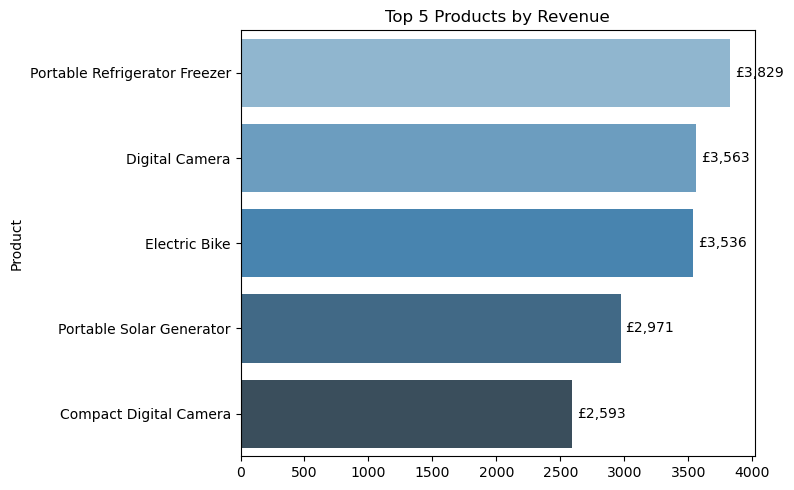

In [181]:
# Bar Chart with data labels
top_5_products = product_revenue.sort_values(by='Revenue', ascending=False).head(5)

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_5_products,
    x='Revenue',
    y='Product Name',
    hue='Product Name',         # Assign y-axis to hue
    palette='Blues_d',
    legend=False                # Hide the legend
)

# Add data labels on the bars
for patch in ax.patches:
    width = patch.get_width()
    ax.text(
        width + 0.01 * top_5_products['Revenue'].max(),
        patch.get_y() + patch.get_height() / 2,
        f"£{width:,.0f}",
        va='center'
    )

ax.set_title('Top 5 Products by Revenue')
ax.set_xlabel('')
ax.set_ylabel('Product')
plt.tight_layout()
plt.show()

### 3. Provide insights into product categories with highest margins

In [168]:
# Step 1: Compute Gross Profit and Margin per row
merged_data['Total_Cost'] = merged_data['Cost Price']
merged_data['Gross_Profit'] = merged_data['Sales'] - merged_data['Total_Cost']
merged_data['Profit_Margin_%'] = (merged_data['Gross_Profit'] / merged_data['Sales']) * 100

In [169]:
# Step 2: Aggregate by category
category_margin = merged_data.groupby('NewCategory').agg({
    'Sales': 'sum',
    'Total_Cost': 'sum',
    'Gross_Profit': 'sum'
}).reset_index()

# Step 3: Calculate margin percentage for each category
category_margin['Profit_Margin_%'] = (category_margin['Gross_Profit'] / category_margin['Sales']) * 100


In [170]:
# Sort by highest margin and select top 5
top_margin_categories = category_margin.sort_values(by='Profit_Margin_%', ascending=False).head(5)

In [171]:
print(top_margin_categories[['NewCategory', 'Profit_Margin_%', 'Gross_Profit', 'Sales']])

      NewCategory  Profit_Margin_%  Gross_Profit    Sales
20       Grooming        70.362424        48.536    68.98
5            Baby        70.192751       362.707   516.73
35        Storage        70.142157       735.188  1048.14
39  Wearable Tech        70.041239      1664.453  2376.39
25  Home Security        69.987030      1958.713  2798.68


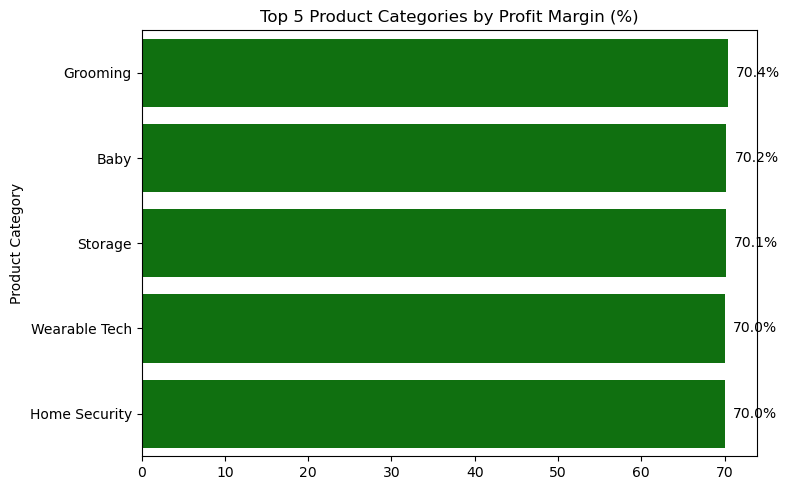

In [172]:
# Ensure categories are ASCII-only
top_margin_categories['NewCategory'] = (
    top_margin_categories['NewCategory']
    .str.encode('ascii', 'ignore')
    .str.decode('ascii')
)

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=top_margin_categories.sort_values('Profit_Margin_%', ascending=False),
    x='Profit_Margin_%',
    y='NewCategory',
    color='green'
)

# Add data labels
for patch in ax.patches:
    width = patch.get_width()
    ax.text(
        width + 1,
        patch.get_y() + patch.get_height() / 2,
        f"{width:.1f}%", 
        va='center'
    )

ax.set_title('Top 5 Product Categories by Profit Margin (%)')
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('Product Category')
plt.tight_layout()
plt.show()

### 4. Analyze sales distribution across Order Mode (Online vs In-Store)

In [122]:
# Group total sales by Order Mode
sales_by_order_mode = merged_data.groupby('Order Mode')['Sales'].sum().reset_index()

sales_by_order_mode['Percentage'] = (
    sales_by_order_mode['Sales'] / sales_by_order_mode['Sales'].sum()
) * 100
print(sales_by_order_mode)

  Order Mode      Sales  Percentage
0   In-Store  145746.63   48.367145
1     Online  155587.32   51.632855


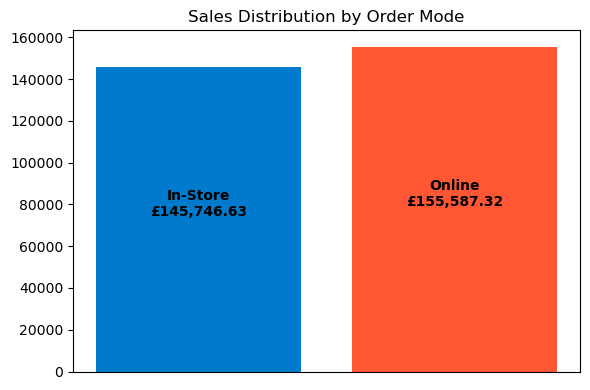

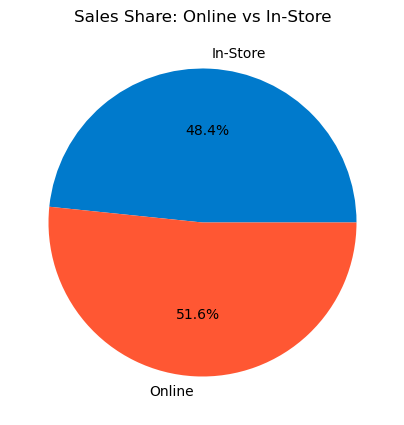

In [173]:
# Bar Chart with data labels
plt.figure(figsize=(6, 4))
bars = plt.bar(sales_by_order_mode['Order Mode'], sales_by_order_mode['Sales'], color=['#007acc', '#ff5733'])
plt.title("Sales Distribution by Order Mode")
plt.xticks([])  # Remove x-axis tick labels
plt.ylabel("")  # Remove y-axis label

# Add data labels directly on top of each bar
for bar, label in zip(bars, sales_by_order_mode['Order Mode']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height - 0.5 * height, 
        f"{label}\n£{height:,.2f}", 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )


plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(
    sales_by_order_mode['Sales'],
    labels=sales_by_order_mode['Order Mode'],
    autopct='%1.1f%%',
    colors=['#007acc', '#ff5733']
)
plt.title("Sales Share: Online vs In-Store")
plt.show()